In [19]:
import numpy as np
import pandas as pd
import seaborn as sn
#import missingno as msno
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("D:\\Machine Learning Projects\\Understanding the buying behaviour\\wholesale_customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)



In [21]:
# Display the data
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [23]:
# Missing data detection
#msno.matrix(data,figsize=(10,3))

<AxesSubplot:>

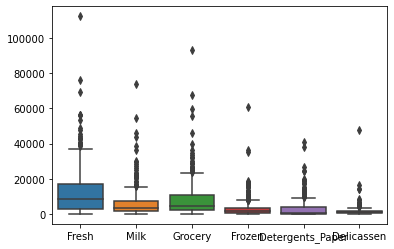

In [24]:
# Data distribution
sn.boxplot(data=data, orient="v")

<AxesSubplot:>

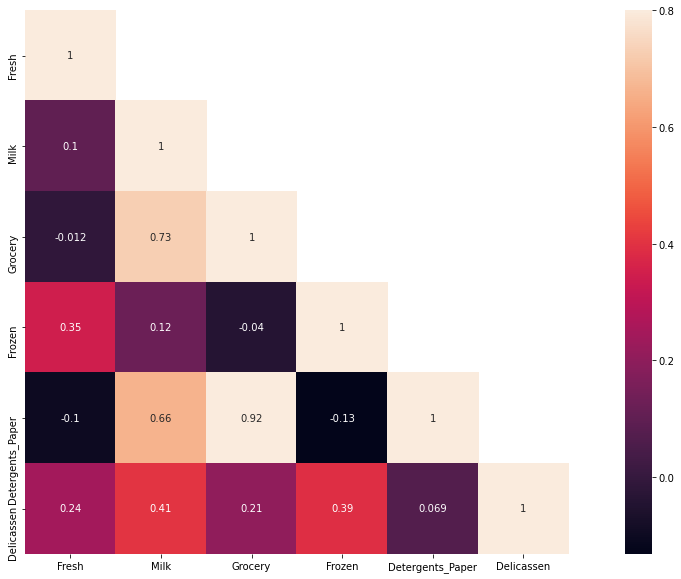

In [25]:
# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


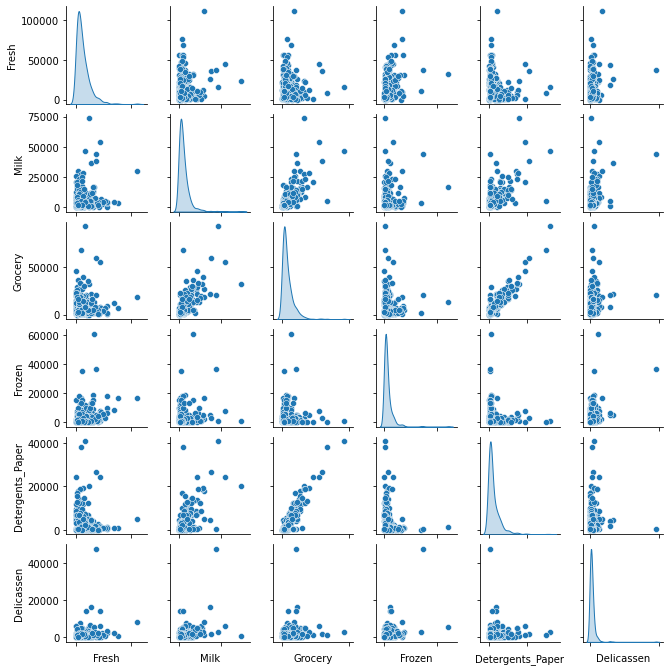

In [26]:
# Scatterplot
mx_plot = sn.pairplot(data, diag_kind="kde", size=1.6)
mx_plot.set(xticklabels=[])

In [11]:
## hierarchical_clustering

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [30]:
# Read the data
#data = pd.read_csv("wholesale_customers.csv")
#data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [31]:
X = data.drop(["Grocery"], axis = 1)

In [32]:
# Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

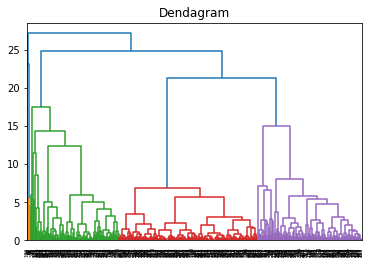

In [33]:
# Create dendragram
dendagram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title("Dendagram")
plt.show()


In [34]:

# Creating model
model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_out = model.fit_predict(X)

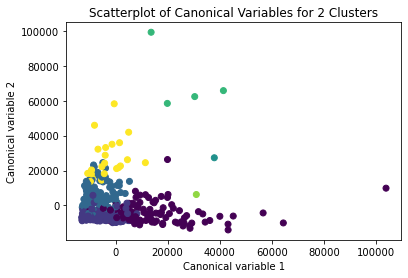

In [35]:
pca_2 = PCA(2) # Two Canonical Variables
plot_columns = pca_2.fit_transform(data)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model.labels_)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()